#  Bio 208: Lecture 06 -- Working with tabular data

## Pandas library

[Pandas](https://pandas.pydata.org/) is a widely used Python library for working with tabular data.

The usual convention that Pandas adopts when working with tabular data is one in which the rows of the data represent the "cases". "observations", or "entities" we're studying (e.g. individuals in a population, genomic features, geographical regions, etc) and the columns of the table represent the variables of interest that have been determined or measured or recorded for those cases or entities (e.g. gene identifiers, sequence length, measures of expression, etc). 

![Image from Pandas tutorial.](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

In [1]:
import pandas as pd
import numpy as np  # we'll import numpy as well, as it will be useful for calculations

### Creating DataFrames

The core data structure in the Pandas library is called a "data frame" (`DataFrame`).

We can create a dataframe by calling the `DataFrame` class with a dictionary in which the keys are the names of the columns, and the values are lists or arrays of the values in each column. This is illustrated below:

In [2]:
df = pd.DataFrame({
    "Name": ["ORF1ab", "S", "E", "M", "N", pd.NA],
    "Start": [266,  21563, 26245, 26523, 28274,99],
    "Stop": [21555, 25384, 26472, 27191, 29533, pd.NA],
    "Product": ["ORF1ab polyprotein", "surface glycoprotein", 
                "envelope protein", "membrane glycoprotein",
                "nucleocapsid phosphoprotein", pd.NA]
})

In [3]:
df

,Name,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein
4,N,28274,29533,nucleocapsid phosphoprotein
5,<NA>,99,<NA>,<NA>


### Reading a DataFrame from a file

Usually we won't be creating DataFrames by hand but rather reading tabular data from files. Pandas include a variety of `read_*` functions such as `read_csv` and `read_excel` for reading such data. We'll primarily using `read_csv` in this class, to read tables delimited with either commas ("comma separated values" = `.csv` files) or tabs ("tab separated values" = `.tsv` files).

In [4]:
# read a test spreadsheet I created in Excel durig our class session
df2 = pd.read_table("/Users/pmagwene/Downloads/example-table.tsv")  

FileNotFoundError: [Errno 2] No such file or directory: '/Users/pmagwene/Downloads/example-table.tsv'

In [ ]:
df2

### What are the names and types of the columns of the DataFrame. What are the dimensions (number of rows and columns) of the DataFrame?

In [ ]:
# return the column names
df.columns

In [8]:
df.dtypes

Name       object
Start       int64
Stop        int64
Product    object
dtype: object

In [9]:
df.shape

(5, 4)

The `len` function applied to a data frame gives the number of rows.

In [10]:
len(df)

5

### Getting a specific column from a DataFrame

To retrieve a specific column of data from a DataFrame we can index the DataFrame with a string that gives the column name of interest.

In [11]:
df["Product"]

0             ORF1ab polyprotein
1           surface glycoprotein
2               envelope protein
3          membrane glycoprotein
4    nucleocapsid phosphoprotein
Name: Product, dtype: object

When a column name would also be a valid Python variable name, there is a short-hand way to access columns, as if they were attributes of the DataFrame, like so:

In [12]:
df.Product

0             ORF1ab polyprotein
1           surface glycoprotein
2               envelope protein
3          membrane glycoprotein
4    nucleocapsid phosphoprotein
Name: Product, dtype: object

### Getting specific rows from a DataFrame using slices

When you index a DataFrame with an integer slice instead of a string, this returns the specified range of rows (obeying Python's standard 0-indexing conventions).  Not that row indexing like this requires a slice; a single integer index won't work with DataFrames.

In [13]:
df[0:2]  # get the first two rows

,Name,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein


In [14]:
df[:1]  # to get the first row I still had to use the slice syntax; df[0] won't work

,Name,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein


### Getting  subset of rows and columns from a DataFrame

If you want to simultaneously get a subset of rows and/or columns, you can use the `DataFrame.loc` (location) attribute. 

One subtle but important point about using `loc` is that when specifing the row slice, the labels correspond not to the integer position along the rows but rather the indexing labels.  When you create a DataFrame, you can specify a set of index labels for the rows.  If you don't specify such labels, Pandas will create a set of default indexing labels based on the integer positions.  This is what is being shown by the numbers in bold on the left margin of the data frames when we display them in this notebook.  The `loc` attribute allows us to create slices based on these row index labels, but these these index label slices differ from the positional slices in that they are inclusive (both start and stop labels are included).  I'll do my best to illustrate how this works below with some examples.

First let's see how to get a specific subset of rows and columns using `loc`:

In [15]:
# get rows with the index labels 3 and 1, and columns "Product" and "Start"
df.loc[[3, 1], ["Product","Start"]]  

,Product,Start
3,membrane glycoprotein,26523
1,surface glycoprotein,21563


We can slice ranges of rows and columns using `loc`:

In [16]:
# all rows, columns from Name to Stop
df.loc[:, "Name":"Stop"]

,Name,Start,Stop
0,ORF1ab,266,21555
1,S,21563,25384
2,E,26245,26472
3,M,26523,27191
4,N,28274,29533


However if we specify a slice on the rows, notice how it uses the label indices on the left to specify what rows to take, and also notice that the slice is inclusive of the last specified row (if this was instead based on Python's standard positional indexing the statement below would be expected to return only two rows):

In [17]:
df.loc[1:3, ["Name","Product"]]

,Name,Product
1,S,surface glycoprotein
2,E,envelope protein
3,M,membrane glycoprotein


The subtleties of row-indexing with `loc` become particularly apparent if we create a version of the table in which we've reversed the row order.

In [18]:
df_reversed = df[::-1]  # get the rows in reversed order
df_reversed

,Name,Start,Stop,Product
4,N,28274,29533,nucleocapsid phosphoprotein
3,M,26523,27191,membrane glycoprotein
2,E,26245,26472,envelope protein
1,S,21563,25384,surface glycoprotein
0,ORF1ab,266,21555,ORF1ab polyprotein


With this reversed version of the data frame, the same slice syntax we used above doesn't work because the row label indices are no longer in the order 1 to 3.

In [19]:
# returns an empty data frame because the label indices 1:3 won't work
df_reversed.loc[1:3, ["Name", "Product"]] 

,Name,Product


However specifying the slice range as `3:1` works because that is consistent with the order of labelled indices in `df_reversed`:

In [20]:
# returns an empty data frame because the label indices 1:3 won't work
df_reversed.loc[3:1, ["Name", "Product"]] 

,Name,Product
3,M,membrane glycoprotein
2,E,envelope protein
1,S,surface glycoprotein


### Selecting cross sections of a DataFrame by integer positions using `DataFrame.iloc`

`DataFrame.iloc` eanbles conventional indexing of both rows and columns by integer position, as illustrated below:

In [21]:
df.iloc[:3, :2]

,Name,Start
0,ORF1ab,266
1,S,21563
2,E,26245


In [22]:
df.iloc[0,2]  # value in the first row, third column

21555

In [23]:
df.iloc[[2,0],[0,3]]

,Name,Product
2,E,envelope protein
0,ORF1ab,ORF1ab polyprotein


In [24]:
df_reversed.iloc[1:3, [0,3]]

,Name,Product
3,M,membrane glycoprotein
2,E,envelope protein


### Creating new columns by computing on existing columns

DataFrames support a simple syntax for creating new columns from existing ones.  Like numpy arrays, most operations with data frame columns work element-by-element so we can calculate new variables of interest from existing ones by applying functions or operations to one or more of the variables.

Here I show how to create a new column "Length" by subtracting the Start coordinates from each of the Stop coordinates:

In [25]:
df["Length"] = df.Stop - df.Start
df

,Name,Start,Stop,Product,Length
0,ORF1ab,266,21555,ORF1ab polyprotein,21289
1,S,21563,25384,surface glycoprotein,3821
2,E,26245,26472,envelope protein,227
3,M,26523,27191,membrane glycoprotein,668
4,N,28274,29533,nucleocapsid phosphoprotein,1259


### Subsetting the rows of a DataFrame by Boolean indexing

When working with large data sets, we frequently want to explore how variables of interest differ across different subsets of the cases.  Pandas (and Numpy) facilitate this sort of analysis by allowing us to subset rows of a DataFrame using Boolean indexing.

To illustrate this we'll look at ways to subset our small data frame to get at genes that meet certain criteria.

The COVID-19 genome is about 30 Kbp in length.  Consider the case where we want to find only those genes towards the "right" end of the genome (i.e. with respect to the arbitrary coordinate system the reference genome has been assigned is reported).  One way to do this would be to find all those genes for which the "Start" value is greater than some cutoff, say 25,000.

Let's see what happens when we compare each of the values (rows) in the "Start" column and asks whether the corresponding value is greater than 25000.  

In [26]:
df.Start > 25000

0    False
1    False
2     True
3     True
4     True
Name: Start, dtype: bool

As you see, we get back a column (Series) of Boolean (True/False) values indicating for which of the corresponding elements the comparison is True.

Since that statement return a Boolean series, we can use it directly to index the rows of our data frame. You might find it useful to read think about the following Python case as saying "df where df.Start is greater than 25000".

In [27]:
df[df.Start > 25000]

,Name,Start,Stop,Product,Length
2,E,26245,26472,envelope protein,227
3,M,26523,27191,membrane glycoprotein,668
4,N,28274,29533,nucleocapsid phosphoprotein,1259


Boolean indexing like this creates a new DataFrame, which we'd typically we'd assign to a variable so would do further computations with it.

In [28]:
endgenes = df[df.Start > 25000]

In [29]:
endgenes.loc[:,["Name","Product"]]

,Name,Product
2,E,envelope protein
3,M,membrane glycoprotein
4,N,nucleocapsid phosphoprotein


### More complex subsetting using Boolean operators

Pandas defines the logical operators `&` (and) and `|` (or) for working with Boolean Series.  For example, the following returns a Boolean Series corresponding to the rows of our data frame where the start position was greater than 25,000 and the gene length was greater than 500.

In [30]:
end_and_long = (df.Start > 25000) & (df.Length > 500)
end_and_long

0    False
1    False
2    False
3     True
4     True
dtype: bool

Again, the final result is a single Boolean series which we can use to filter or subset the rows of our data frame:

In [31]:
df[end_and_long]

,Name,Start,Stop,Product,Length
3,M,26523,27191,membrane glycoprotein,668
4,N,28274,29533,nucleocapsid phosphoprotein,1259


### Creating plots from DataFrames

When generating plots from data in Pandas DataFrames you can pass variables of interest to the respective `matplotlib` functions or use plotting attributes associated with the DataFrame object (which in turn uses matplotlib as it's backend).  I illustrate both approaches below.

In [32]:
from matplotlib import pyplot as plt

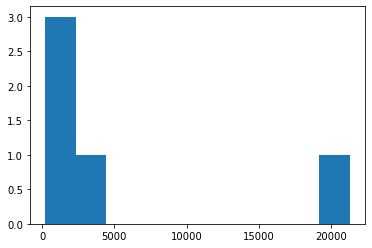

In [33]:
# generate a histogram of genes Lengths
plt.hist(df.Length)

pass # adding pass here prevents the data objects returned from 
     # plt.hist from being printed in the output. This is just to make
     # the notebook output look neat and tidy.

Using the `plot` attribute associated with DataFrames:

<AxesSubplot:ylabel='Frequency'>

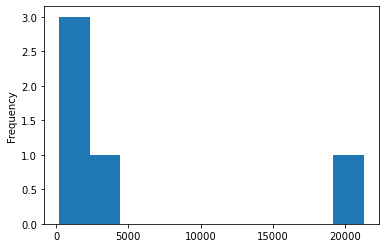

In [34]:
df.Length.plot.hist()

### Summary statistics from DataFrames

Numerical columns in DataFrame support built-in methods for calculating summary statistics:

In [35]:
df.Length.mean()  # average length of the genes

5452.8

In [36]:
df.Length.median() # median length of the genes

1259.0

In [37]:
df.Length.describe()  # mulitiple summary statistics about the values in the Length column

count        5.000000
mean      5452.800000
std       8961.574315
min        227.000000
25%        668.000000
50%       1259.000000
75%       3821.000000
max      21289.000000
Name: Length, dtype: float64

## Working with a table of features from the Saccharomyces Genome Database (SGD)

The file [`SGD_features.tsv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/SGD_features.tsv) is a tab-delimited file I downloaded from SGD that summarizes key pieces of information about genome features in the budding yeast genome.  The original file can be found here: http://sgd-archive.yeastgenome.org/curation/chromosomal_feature/

Here's a short summary of the contents of this file, from the "SGD_features.README" document:

```
1. Information on current chromosomal features in SGD, including Dubious ORFs. 
Also contains coordinates of intron, exons, and other subfeatures that are located within a chromosomal feature.

2. The relationship between subfeatures and the feature in which they
are located is identified by the feature name in column #7 (parent
feature). For example, the parent feature of the intron found in
ACT1/YFL039C will be YFL039C. The parent feature of YFL039C is
chromosome 6.

3. The coordinates of all features are in chromosomal coordinates.

Columns within SGD_features.tab:

1.   Primary SGDID (mandatory)
2.   Feature type (mandatory)
3.   Feature qualifier (optional)
4.   Feature name (optional)
5.   Standard gene name (optional)
6.   Alias (optional, multiples separated by |)
7.   Parent feature name (optional)
8.   Secondary SGDID (optional, multiples separated by |)
9.   Chromosome (optional)
10.  Start_coordinate (optional)
11.  Stop_coordinate (optional)
12.  Strand (optional)
13.  Genetic position (optional)
14.  Coordinate version (optional)
15.  Sequence version (optional)
16.  Description (optional)

Note that "chromosome 17" is the mitochondrial chromosome.
```


Download [`SGD_features.tsv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/SGD_features.tsv) to your computer and then load it using the `read_csv` function, specifying the delimiter argument as a tab:

In [39]:
features = pd.read_csv("/Users/pmagwene/Downloads/SGD_features.tsv", delimiter="\t")

## What are the dimensions of this data set?

In [40]:
features.shape

(16454, 16)

## What are the columns names and data types?

In [41]:
features.columns

Index(['SGDID', 'Type', 'Qualifier', 'Name', 'Gene', 'Alias', 'Parent',
       'Secondary', 'Chromosome', 'Start', 'Stop', 'Strand', 'GeneticPosition',
       'CoordVersion', 'SeqVersion', 'Description'],
      dtype='object')

In [42]:
features.dtypes

SGDID               object
Type                object
Qualifier           object
Name                object
Gene                object
Alias               object
Parent              object
Secondary           object
Chromosome          object
Start              float64
Stop               float64
Strand              object
GeneticPosition    float64
CoordVersion        object
SeqVersion          object
Description         object
dtype: object

## How many genome features are there in the  yeast genome?

In [43]:
len(features)  

16454

## What are the different feature types?

In [44]:
features.Type.unique()  # gives unique elements in a column

array(['ORF', 'CDS', 'ARS', 'telomere', 'telomeric_repeat', 'X_element',
       'X_element_combinatorial_repeat', 'long_terminal_repeat',
       'ARS_consensus_sequence', 'intron', 'ncRNA_gene', 'noncoding_exon',
       'tRNA_gene', 'snoRNA_gene', 'centromere',
       'centromere_DNA_Element_I', 'centromere_DNA_Element_II',
       'centromere_DNA_Element_III', 'transposable_element_gene',
       'LTR_retrotransposon', 'pseudogene', 'Y_prime_element',
       'five_prime_UTR_intron', 'plus_1_translational_frameshift',
       'matrix_attachment_site', 'gene_group', 'snRNA_gene', 'rRNA_gene',
       'external_transcribed_spacer_region',
       'internal_transcribed_spacer_region', 'non_transcribed_region',
       'blocked_reading_frame', 'origin_of_replication',
       'telomerase_RNA_gene', 'silent_mating_type_cassette_array',
       'W_region', 'X_region', 'Y_region', 'Z1_region', 'Z2_region',
       'mating_type_region', 'intein_encoding_region',
       'not physically mapped', 'not in 

In [45]:
len(features.Type.unique())

44

## Check the chromosome designations

In [46]:
features.Chromosome.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '2',
       '2-micron', '3', '4', '5', '6', '7', '8', '9', nan], dtype=object)

## Adding a new column - Length

In [47]:
# using np.abs here because for some of the features Start > Stop
features["Length"] = np.abs(features.Stop - features.Start)

In [48]:
features.Length.dtype

dtype('float64')

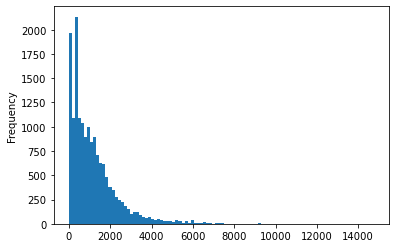

In [49]:
# create a histogram showing distribution of lengths of features
features.Length.plot.hist(bins=100)
pass

## How  many of those features are annotated as "ORFs" (open reading frames)?

In [50]:
orfs = features[features.Type == "ORF"]
len(orfs)

6604

## Sorting ORFs based on their length

In [51]:
orfs.sort_values("Length").loc[:,["SGDID", "Chromosome",
                                  "Gene","Length","Description"]].head()

,SGDID,Chromosome,Gene,Length,Description
1254,S000028557,10,NaN,50.0,Putative protein of unknown function; identifi...
10332,S000007602,4,NaN,74.0,Dubious open reading frame; unlikely to encode...
9527,S000007594,2,NaN,74.0,Dubious open reading frame; unlikely to encode...
10593,S000002293,4,RPL41B,77.0,Ribosomal 60S subunit protein L41B; comprises ...
7035,S000005828,15,NaN,77.0,"CPA1 uORF; Arginine attenuator peptide, regula..."


In [52]:
# sort in descending order
orfs.sort_values("Length", ascending=False).loc[:,["SGDID", "Chromosome",
                                                   "Gene","Length","Description"]].head()

,SGDID,Chromosome,Gene,Length,Description
2523,S000004096,12,MDN1,14732.0,Huge dynein-related AAA-type ATPase (midasin);...
8569,S000007260,17,COX1,12883.0,Subunit I of cytochrome c oxidase (Complex IV)...
1973,S000001762,11,DYN1,12278.0,Cytoplasmic heavy chain dynein; microtubule mo...
15453,S000001141,8,TRA1,11234.0,Subunit of SAGA and NuA4 histone acetyltransfe...
12102,S000002865,4,TOM1,9806.0,E3 ubiquitin ligase of the hect-domain class; ...


## Convert the Chromosome data type from object to numerical type

In [53]:
# drop the 2-micron from consideration
orfs = orfs[orfs.Chromosome != "2-micron"].copy() 

# we use copy above because we're going to make some modifications of the ORF data
# so we want an independent copy of the data not a "view" into the features DataFrame

In [54]:
orfs.loc[:,"Chromosome"] = pd.to_numeric(orfs.Chromosome)

In [55]:
orfs.Chromosome.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17,  2,  3,  4,  5,  6,  7,  8,  9])

## Distribution of ORF lengths

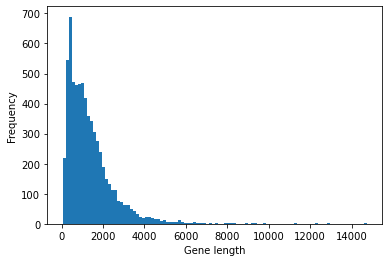

In [56]:
plt.hist(orfs.Length, bins=100)
plt.xlabel("Gene length")
plt.ylabel("Frequency")
pass

Since lengths differ by several orders of magnitude, a log-transform might be useful

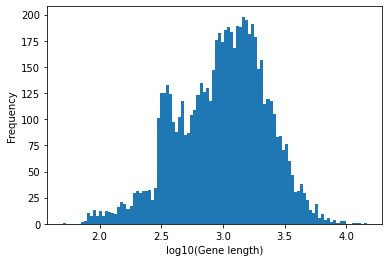

In [57]:
plt.hist(np.log10(orfs.Length),bins = 100)
plt.xlabel("log10(Gene length)")
plt.ylabel("Frequency")
pass

### How many of the ORFS are designated as "Dubious"? How many are "Verified"?

In [58]:
dubious = orfs[orfs.Qualifier == "Dubious"]
len(dubious)

717

In [59]:
verified = orfs[orfs.Qualifier == "Verified"]
len(verified)

5151

### What is the distribution of length of dubious ORFs? What is the distribution of lengths of verified ORFs?

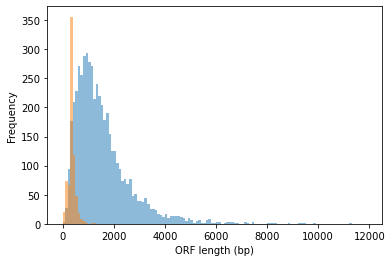

In [60]:
plt.hist(verified.Length, alpha=0.5, bins=np.arange(0,12000,100))
plt.hist(dubious.Length, alpha=0.5, bins=np.arange(0,12000,100))

# add labels
plt.xlabel("ORF length (bp)")
plt.ylabel("Frequency")
pass


In [61]:
dubious.Length.median(), verified.Length.median()

(347.0, 1283.0)

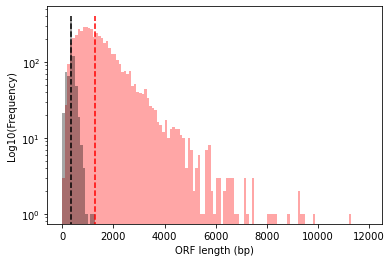

In [62]:
# here we're looking at the the log10 of the frequencies NOT the lengths

# generate histograms
plt.hist(verified.Length, color='red', alpha=0.35, bins=np.arange(0,12000,100),log=True)
plt.hist(dubious.Length, color='black', alpha=0.35, bins=np.arange(0,12000,100), log=True)

# add dashed lines representing median lengths
plt.vlines(dubious.Length.median(), ymin=0, ymax=400, color='black', linestyle="dashed")
plt.vlines(verified.Length.median(), ymin=0, ymax=400, color='red', linestyle="dashed")

# add labels
plt.xlabel("ORF length (bp)")
plt.ylabel("Log10(Frequency)")
pass

## Dubious + Verified is not the full set of ORFS. What are the other Qualifier values?

In [63]:
orfs.Qualifier.unique()

array(['Dubious', 'Verified', 'Uncharacterized', 'Verified|silenced_gene'],
      dtype=object)

## Using groupby to get a breakdown of ORFs

In [64]:
orfs.groupby("Qualifier").Qualifier.count()

Qualifier
Dubious                    717
Uncharacterized            728
Verified                  5151
Verified|silenced_gene       4
Name: Qualifier, dtype: int64

In [65]:
orfs.Qualifier.value_counts()  # short hand for counting things in categories

Verified                  5151
Uncharacterized            728
Dubious                    717
Verified|silenced_gene       4
Name: Qualifier, dtype: int64

## Using the groupby method to calculate aggregate statistics

In [66]:
orfs.groupby("Qualifier").Length.median()

Qualifier
Dubious                    347.0
Uncharacterized            579.5
Verified                  1283.0
Verified|silenced_gene     506.5
Name: Length, dtype: float64

## Grouping by multiple variables

In [67]:
orfs.groupby(["Chromosome", "Qualifier"]).Qualifier.count().head(6)
# table continues on but I just took the first six values to truncate output

Chromosome  Qualifier      
1           Dubious             25
            Uncharacterized     15
            Verified            77
2           Dubious             51
            Uncharacterized     46
            Verified           359
Name: Qualifier, dtype: int64

## Visualizations of Chromosomes

In [69]:
# load chromosome length data
chroms = pd.read_csv("/Users/pmagwene/Downloads/chromosome_length.tsv", 
                     delimiter="\t")

In [70]:
chroms.head()

,Chromosome,Systematic Name,Length
0,1,NC_001133,230218
1,2,NC_001134,813184
2,3,NC_001135,316620
3,4,NC_001136,1531933
4,5,NC_001137,576874


## Plot the ORFS on a single chromosome

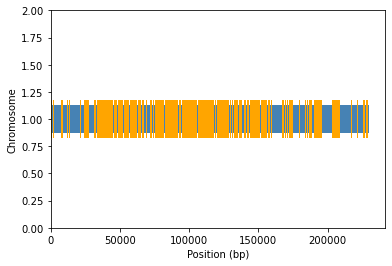

In [71]:
# plot chromosome 1
plt.barh(1, chroms.Length[chroms.Chromosome == 1], height=0.25, color='steelblue')

chr01orfs = orfs[orfs.Chromosome == 1]

for (start, stop) in zip(chr01orfs.Start, chr01orfs.Stop):
    left = min(start, stop)
    width = abs(stop - start)
    plt.barh(1, width, left=left, color='orange', height=0.35)


plt.xlabel("Position (bp)")
plt.ylabel("Chromosome")
    
# specify specific y-axis scaling to make this look nice
plt.ylim(0,2)
pass

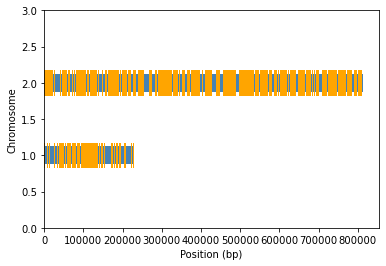

In [72]:
# plot chromosome 1 and 2 orfs

plt.barh(1, chroms.Length[chroms.Chromosome == 1], height=0.25, color='steelblue')
plt.barh(2, chroms.Length[chroms.Chromosome == 2], height=0.25, color='steelblue')

focalorfs = orfs[orfs.Chromosome.isin([1,2])]

for (chrom, start, stop) in zip(focalorfs.Chromosome, focalorfs.Start, focalorfs.Stop):
    left = min(start, stop)
    width = abs(stop - start)
    plt.barh(chrom, width, left=left, color='orange', height=0.35)
    
plt.xlabel("Position (bp)")
plt.ylabel("Chromosome")
    
# specify specific y-axis scaling to make this look nice
plt.ylim(0,3)
pass